In [183]:
#https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import altair as alt #https://cmdlinetips.com/2019/12/barplots-scatter-plots-boxplots-with-altair-4-0/
print(pd.__version__)
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


0.25.3


In [184]:
file = r'/Users/felix.baertschi/Documents/BFH/Regression/daten/1_Autopreise.xlsx'
#df = pd.read_excel("/Users/felix.baertschi/Documents/BFH/Regression/Autopreise.xlsx")
df = pd.read_excel(file)
df.head

<bound method NDFrame.head of     obs  Preis Alter     KM
0     1  16990  2,37  46200
1     2  14000  3,38  92600
2     3  18000  2,28  35000
3     4  14500  3,38  73000
4     5  14100  3,46  84400
..  ...    ...   ...    ...
56   57  16900  2,11  55000
57   58  19980  0,59   1500
58   59  20000  1,27  16500
59   60  18500  1,69  29300
60   61  14000  3,21  56400

[61 rows x 4 columns]>

In [185]:
#something like summary
df.describe()



,obs,Preis,KM
count,61.000000,61.000000,61.000000
mean,31.000000,16140.163934,53367.721311
std,17.752934,4029.834774,42556.395192
min,1.000000,6700.000000,1500.000000
25%,16.000000,14000.000000,22500.000000
50%,31.000000,16900.000000,35900.000000
75%,46.000000,18500.000000,75000.000000
max,61.000000,28400.000000,188000.000000


In [186]:
#Replace "," with "."
df['Alter'] = df['Alter'].str.replace(',','.')
df.head

<bound method NDFrame.head of     obs  Preis Alter     KM
0     1  16990  2.37  46200
1     2  14000  3.38  92600
2     3  18000  2.28  35000
3     4  14500  3.38  73000
4     5  14100  3.46  84400
..  ...    ...   ...    ...
56   57  16900  2.11  55000
57   58  19980  0.59   1500
58   59  20000  1.27  16500
59   60  18500  1.69  29300
60   61  14000  3.21  56400

[61 rows x 4 columns]>

In [187]:
#convert string to int
df['Alter'] = df['Alter'].apply(float)
df.dtypes

obs        int64
Preis      int64
Alter    float64
KM         int64
dtype: object

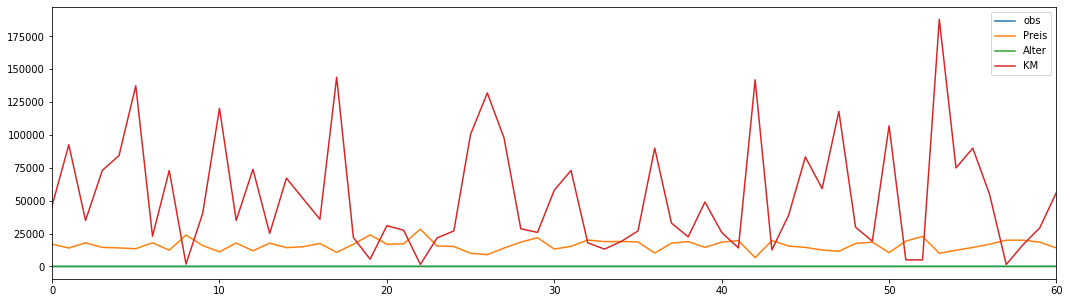

In [188]:
df.plot(figsize=(18,5))


In [189]:
#Checking for any missing values
df.isnull().values.any()
#The “False” output confirms that there are no null values in the dataframe.



False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1204fc128>,
      dtype=object)

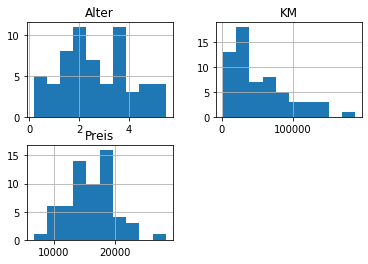

In [190]:
#Create histogram for KM, Preis, Alter
df.hist(column=["KM","Preis","Alter"])


In [191]:
# simple barplot with Altair
barplot_altair = alt.Chart(df).mark_bar().encode(
    x='KM'
)
# plot bar chart
barplot_altair


alt.Chart(...)

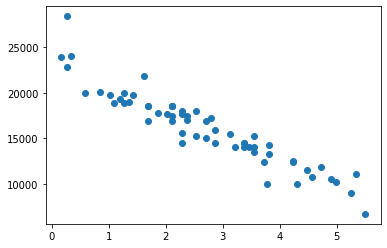

In [192]:
#Scatterplot for Preis vs ALter
sp1 = plt.scatter(df["Alter"], df["Preis"])


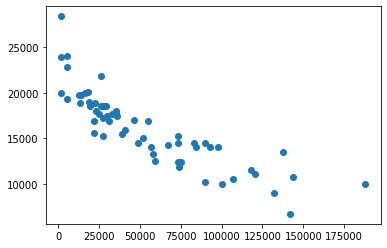

In [193]:
#Scatterplot for Preis vs KM
plt.scatter(df["KM"], df["Preis"])



In [194]:
x = df[["Alter"]]
y = df[["Preis"]]
regr = linear_model.LinearRegression()
regr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

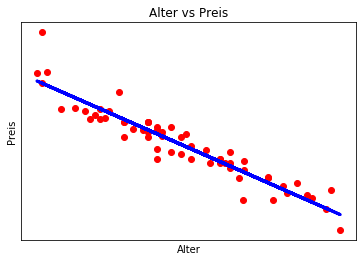

In [195]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='red')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('Alter vs Preis')
plt.xlabel('Alter')
plt.ylabel('Preis')
plt.xticks(())
plt.yticks(())
plt.show()


In [196]:
chart = alt.Chart(df).mark_point().encode(
    x='Alter',
    y='Preis'
)
#.interactive()
chart

alt.Chart(...)

In [197]:
chart + chart.transform_regression('Alter', 'Preis',method="linear"
).mark_line(color="red")



alt.LayerChart(...)